# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

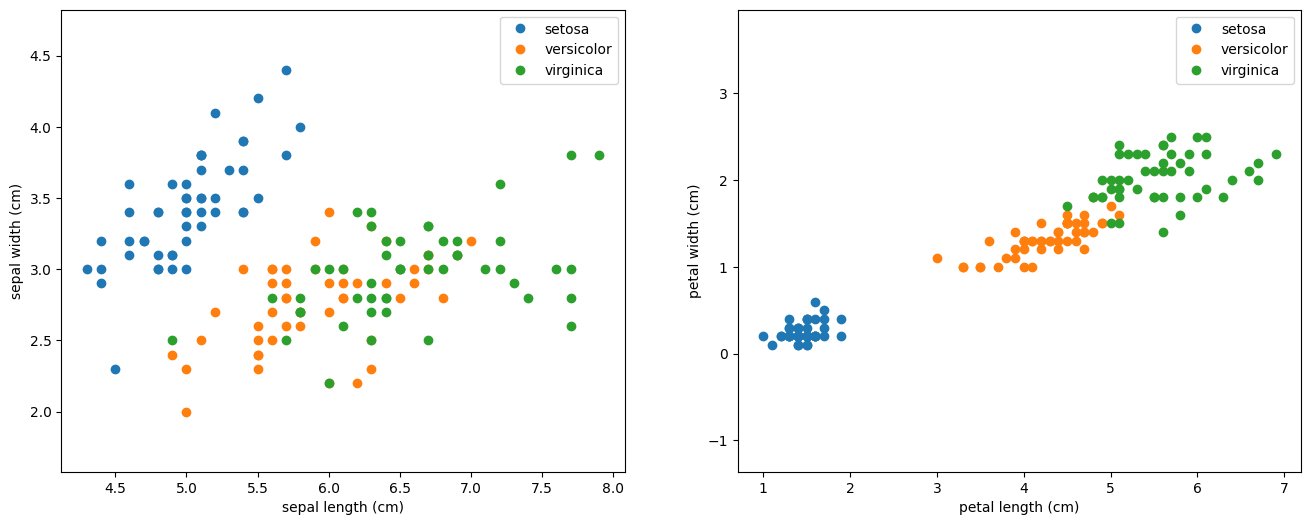

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 114.72it/s]


# Plot training progress

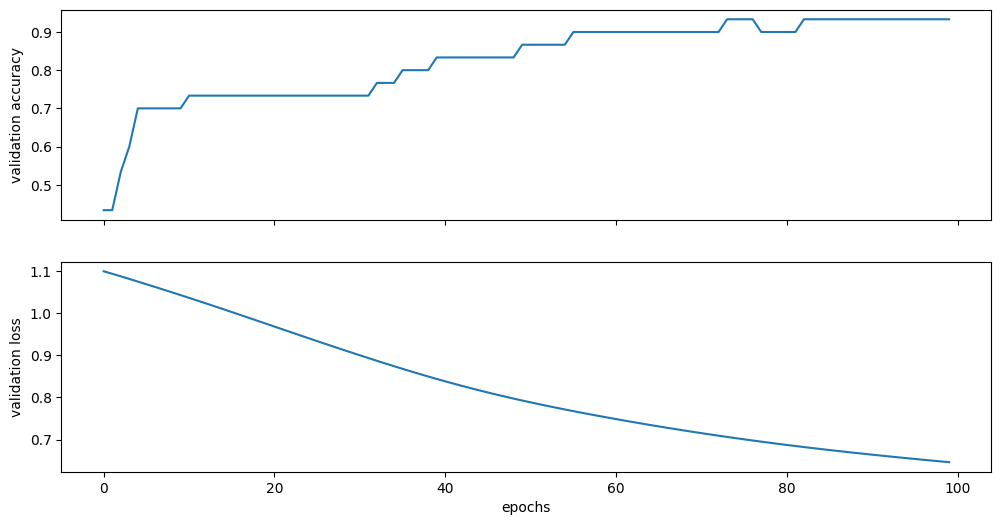

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

question 1

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the number of hidden layers you want
num_hidden_layers = 3  # You can change this value as needed

# Define your neural network model
def create_model(num_hidden_layers):
    model = models.Sequential()

    # Add input layer
    model.add(layers.InputLayer(input_shape=(input_shape)))  # Define your input shape

    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(units=128, activation='relu'))  # Example hidden layer with 128 units and ReLU activation

    # Add output layer
    model.add(layers.Dense(units=num_classes, activation='softmax'))  # Define your output layer

    return model

# Example usage
input_shape = (28, 28)  # Example input shape
num_classes = 10  # Example number of output classes

model = create_model(num_hidden_layers)
model.summary()  # Display the model architecture


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 128)           3712      
                                                                 
 dense_1 (Dense)             (None, 28, 128)           16512     
                                                                 
 dense_2 (Dense)             (None, 28, 128)           16512     
                                                                 
 dense_3 (Dense)             (None, 28, 10)            1290      
                                                                 
Total params: 38026 (148.54 KB)
Trainable params: 38026 (148.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


question 2

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the number of neurons in each hidden layer
num_neurons_per_layer = [256, 128, 64]  # You can change this list as needed

# Define your neural network model
def create_model(num_neurons_per_layer):
    model = models.Sequential()

    # Add input layer
    model.add(layers.InputLayer(input_shape=(input_shape)))  # Define your input shape

    # Add hidden layers
    for neurons in num_neurons_per_layer:
        model.add(layers.Dense(units=neurons, activation='relu'))  # Add a hidden layer with specified number of neurons and ReLU activation

    # Add output layer
    model.add(layers.Dense(units=num_classes, activation='softmax'))  # Define your output layer

    return model

# Example usage
input_shape = (28, 28)  # Example input shape
num_classes = 10  # Example number of output classes

model = create_model(num_neurons_per_layer)
model.summary()  # Display the model architecture


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28, 256)           7424      
                                                                 
 dense_5 (Dense)             (None, 28, 128)           32896     
                                                                 
 dense_6 (Dense)             (None, 28, 64)            8256      
                                                                 
 dense_7 (Dense)             (None, 28, 10)            650       
                                                                 
Total params: 49226 (192.29 KB)
Trainable params: 49226 (192.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Question 3

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the activation function for hidden layers
activation_functions = ['relu', 'tanh', 'sigmoid']  # You can change this list as needed

# Define your neural network model
def create_model(activation_functions):
    model = models.Sequential()

    # Add input layer
    model.add(layers.InputLayer(input_shape=(input_shape)))  # Define your input shape

    # Add hidden layers with different activation functions
    for activation_func in activation_functions:
        model.add(layers.Dense(units=128, activation=activation_func))  # Add a hidden layer with 128 neurons and specified activation function

    # Add output layer
    model.add(layers.Dense(units=num_classes, activation='softmax'))  # Define your output layer

    return model

# Example usage
input_shape = (28, 28)  # Example input shape
num_classes = 10  # Example number of output classes

model = create_model(activation_functions)
model.summary()  # Display the model architecture


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 28, 128)           3712      
                                                                 
 dense_9 (Dense)             (None, 28, 128)           16512     
                                                                 
 dense_10 (Dense)            (None, 28, 128)           16512     
                                                                 
 dense_11 (Dense)            (None, 28, 10)            1290      
                                                                 
Total params: 38026 (148.54 KB)
Trainable params: 38026 (148.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
